In [1]:
import pandas as pd
from neuralprophet import NeuralProphet

In [2]:
df_ercot = pd.read_csv("../example_data/energy/ERCOT_load_2004_2021Sept.csv")
df_ercot.head()

,ds,COAST,EAST,FAR_WEST,NORTH,NORTH_C,SOUTHERN,SOUTH_C,WEST,y
0,2004-01-01 01:00:00,7225.09,877.79,1044.89,745.79,7124.21,1660.45,3639.12,654.61,22971.94
1,2004-01-01 02:00:00,6994.25,850.75,1032.04,721.34,6854.58,1603.52,3495.16,639.88,22191.52
2,2004-01-01 03:00:00,6717.42,831.63,1021.10,699.70,6639.48,1527.99,3322.70,623.42,21383.44
3,2004-01-01 04:00:00,6554.27,823.56,1015.41,691.84,6492.39,1473.89,3201.72,613.49,20866.56
4,2004-01-01 05:00:00,6511.19,823.38,1009.74,686.76,6452.26,1462.76,3163.74,613.32,20723.15


In [3]:
regions = list(df_ercot)[1:-1]

In [4]:
df_ercot['y'].isnull().sum()

1

# Baseline Model

In [5]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    learning_rate=0.1, 
    # train_speed=1,
)
metrics = m.fit(df, freq="H")

INFO - (NP.forecaster.single_handle_missing_data) - dropped 1 NAN row in 'y'
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 51
Epoch[51/51]: 100%|████████████████████████████████████████████████████████████████████████████████| 51/51 [01:37<00:00,  1.91s/it, SmoothL1Loss=0.00804, MAE=3.75e+3, MSE=2.33e+7, RegLoss=0]


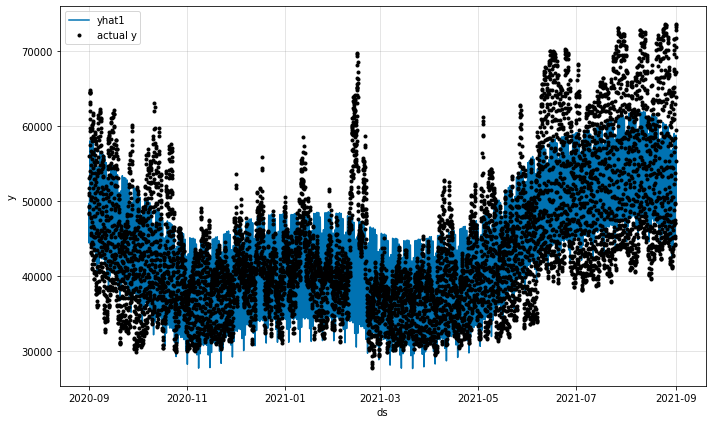

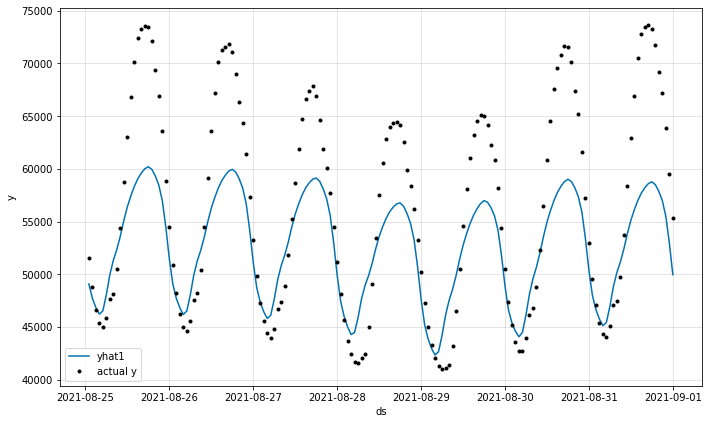

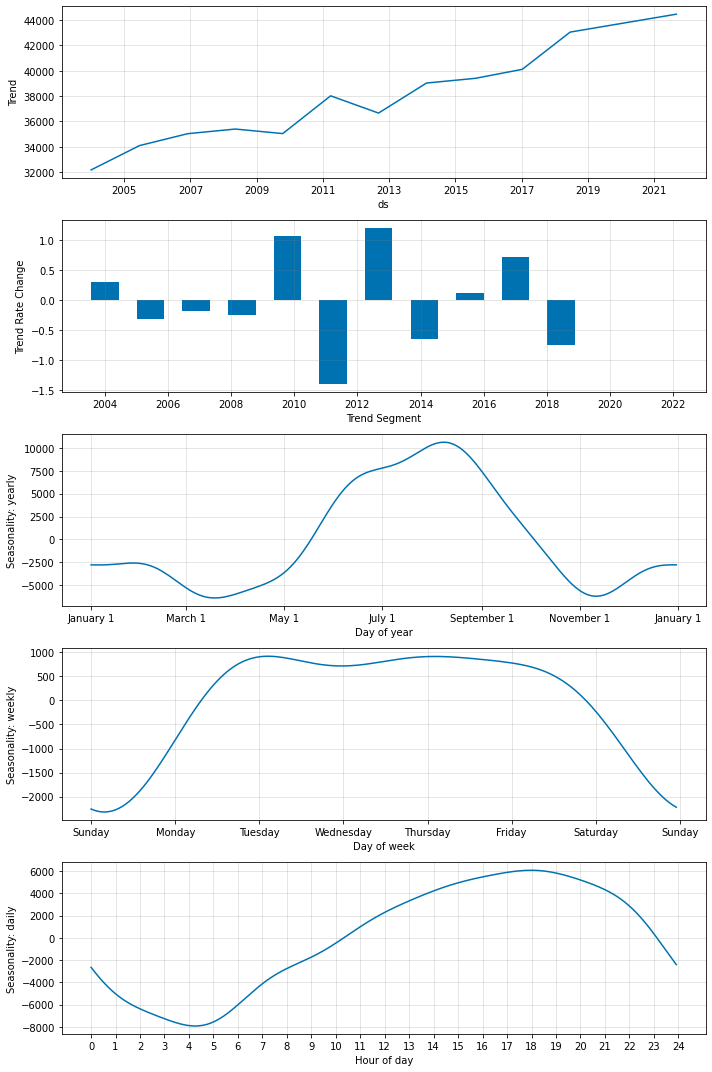

In [6]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast)
param = m.plot_parameters()

#  3-steps ahead AR Model

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate=0.1,
    # train_speed=1,
)
m = m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")


INFO - (NP.forecaster.single_handle_missing_data) - 18 missing dates added.
INFO - (NP.forecaster.single_handle_missing_data) - 19 NaN values in column y were auto-imputed.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 128
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 51
Epoch[5/51]:  10%|██▋                         | 5/51 [00:11<01:47,  2.34s/it, SmoothL1Loss=0.00137, MAE=1.52e+3, MSE=3.97e+6, SmoothL1Loss-3=0.00216, MAE-3=1.92e+3, MSE-3=6.25e+6, RegLoss=0]

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

# 3-steps ahead AR and Lagged Regressors Model

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=3,
    n_lags=3,
    learning_rate= 0.1,
    # train_speed=1,
)
m = m.add_lagged_regressor(names=regions) #, only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(3)
metrics = m.fit(df, freq="H")


In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

# 24-steps ahead Long AR Model

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.1,
    # train_speed=1,
)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

# 24-steps ahead Long AR Model with last observation of Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.1,
    # train_speed=1,
)
m = m.add_lagged_regressor(names=regions, only_last_value=True)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

# 24-steps ahead AR Model with full Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=24,
    learning_rate=0.1,
    # train_speed=1,
)
m = m.add_lagged_regressor(names=regions)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

# 24-steps ahead Neural Model with Long AR

In [ ]:
df = pd.DataFrame({"ds": df_ercot["ds"], "y": df_ercot["y"]})m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.01,
    num_hidden_layers=1,
    d_hidden=16,
    # train_speed=1,
)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
comp = m.plot_components(forecast[-7*24:])
# param = m.plot_parameters()

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=24,
    learning_rate=0.1,
    # train_speed=1,
)
m = m.add_lagged_regressor(names=regions, regularization=10)
m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
# comp = m.plot_components(forecast[-7*24:])
param = m.plot_parameters()

# 24-steps ahead Neural Model with Long AR and Lagged Regressors

In [ ]:
df = df_ercot
m = NeuralProphet(
    n_forecasts=24,
    n_lags=7*24,
    learning_rate=0.01,
    num_hidden_layers=1,
    d_hidden=16,
    # train_speed=1,
)
m = m.add_lagged_regressor(names=regions)#, only_last_value=True)
m = m.highlight_nth_step_ahead_of_each_forecast(24)
metrics = m.fit(df, freq="H")

# metrics

In [ ]:
future = m.make_future_dataframe(df, periods=0, n_historic_predictions=True)
forecast = m.predict(future)
# fig = m.plot(forecast)
fig1 = m.plot(forecast[-365*24:])
fig2 = m.plot(forecast[-7*24:])
comp = m.plot_components(forecast[-7*24:])
# param = m.plot_parameters()